# Question 1#

* **Learn and understand Zipf’s Law.** 
* **Pick any file (or files) in NLTK package. **
* **Prove if Zipf’s Law works in Natural Language or not. **

In [6]:
import glob
import nltk
import collections
import string
from nltk.corpus import gutenberg

In [7]:
wordCounter = collections.Counter()

for name in gutenberg.fileids() :
    words = gutenberg.words(name)
    l = []
    for word in words :
        if word in set(string.punctuation) :
            continue
        l.append(word.lower())
    
    words = collections.Counter(l)
    wordCounter = wordCounter + words
    
print (wordCounter.most_common(10))

[('the', 133583), ('and', 95442), ('of', 71267), ('to', 48057), ('a', 33960), ('in', 33580), ('i', 30265), ('that', 28798), ('he', 25857), ('it', 22303)]


In [8]:
total = sum(wordCounter.values())
total

2226513

In [13]:
rows = [['Word', 'Rank', 'Frequency']]
rank = 1
for word,frequency in wordCounter.most_common() :
    row = [word, rank, frequency]
    rows.append(row)
    rank = rank + 1
    
rows[:10]

[['Word', 'Rank', 'Frequency'],
 ['the', 1, 133583],
 ['and', 2, 95442],
 ['of', 3, 71267],
 ['to', 4, 48057],
 ['a', 5, 33960],
 ['in', 6, 33580],
 ['i', 7, 30265],
 ['that', 8, 28798],
 ['he', 9, 25857]]

In [15]:
import csv

f = open('ZipfsLaw.csv', 'w+')
try:
    writer = csv.writer(f)
    writer.writerows(rows)
finally:
    f.close()

In [10]:
import csv

c = []

f = open('ZipfsLaw.csv', 'r')
try:
    reader = csv.DictReader(f)
    for row in reader :
        d = {}
        d['r'] = int(row['Rank'])
        d['Prob'] = int(row['Frequency'])/total
        d['A'] = d['r'] * d['Prob']
        c.append(d)
    
finally:
    f.close()
    
c[:10]

[{'A': 0.05999650574687864, 'Prob': 0.05999650574687864, 'r': 1},
 {'A': 0.08573226385832915, 'Prob': 0.04286613192916457, 'r': 2},
 {'A': 0.09602504005141672, 'Prob': 0.032008346683805575, 'r': 3},
 {'A': 0.08633589833070815, 'Prob': 0.021583974582677037, 'r': 4},
 {'A': 0.07626274807288347, 'Prob': 0.015252549614576694, 'r': 5},
 {'A': 0.09049127492181722, 'Prob': 0.015081879153636202, 'r': 6},
 {'A': 0.09515102763828462, 'Prob': 0.013593003948326373, 'r': 7},
 {'A': 0.10347300914030146, 'Prob': 0.012934126142537682, 'r': 8},
 {'A': 0.1045190394127499, 'Prob': 0.011613226601416655, 'r': 9},
 {'A': 0.10017008658831096, 'Prob': 0.010017008658831096, 'r': 10}]

In [11]:
import math

def stdev(l, n, mean) :
    t = 0
    diffSquared = lambda x,y : (x - y)**2
    for x in l :
        t = t + diffSquared(x,mean)
    
    return math.sqrt((1/(n - 1))*t)

In [12]:
sumA = 0
A = []
for row in c :
    sumA = sumA + row['A']
    A.append(row['A'])
    
print(sumA)
print(A[:10])

1406.5520497746952
[0.05999650574687864, 0.08573226385832915, 0.09602504005141672, 0.08633589833070815, 0.07626274807288347, 0.09049127492181722, 0.09515102763828462, 0.10347300914030146, 0.1045190394127499, 0.10017008658831096]


In [15]:
averageA = sumA / len(A)

print('Average A :', averageA)

sd = stdev(A, total, averageA)

print('Range :', min(A), '-', max(A))

print('Standard Deviation :', sd)

Average A : 0.033240819817901765
Range : 0.012074485978747935 - 0.15674375132774881
Standard Deviation : 0.0031122061972156207


In [17]:
import matplotlib.pyplot as plt

logr = [ math.log(x['r']) for x in c ]
logp = [ math.log(x['Prob']) for x in c ]


In [24]:
from scipy.stats.stats import pearsonr

r = pearsonr(logr, logp)

print("Pearson Correlation Coefficient :", r)

Pearson Correlation Coefficient : (-0.98817556366538384, 0.0)


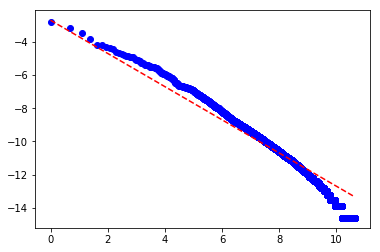

In [23]:
plt.plot(logr, logp, 'bo', logr, [(-1 * x) - 2.7 for x in logr], 'r--')
plt.show()

In [25]:
from pydoc import help
help(pearsonr)

Help on function pearsonr in module scipy.stats.stats:

pearsonr(x, y)
    Calculates a Pearson correlation coefficient and the p-value for testing
    non-correlation.
    
    The Pearson correlation coefficient measures the linear relationship
    between two datasets. Strictly speaking, Pearson's correlation requires
    that each dataset be normally distributed, and not necessarily zero-mean.
    Like other correlation coefficients, this one varies between -1 and +1
    with 0 implying no correlation. Correlations of -1 or +1 imply an exact
    linear relationship. Positive correlations imply that as x increases, so
    does y. Negative correlations imply that as x increases, y decreases.
    
    The p-value roughly indicates the probability of an uncorrelated system
    producing datasets that have a Pearson correlation at least as extreme
    as the one computed from these datasets. The p-values are not entirely
    reliable but are probably reasonable for datasets larger than 

## Conclusion
The Correlation coefficient is -0.98817556366538384. This means that there is an almost linear negative correlation between log(r) and log(Prob(r)). This along with the graph demonstrates that Zipf's Law seems to hold true